# Logistic Regression Project

In this project i will be using an advertisement dataset indicating whether or not a user clicked on an advertisement, to create a model which will predict if they will click on an ad.

I will be using logistic regression to train the model. So lets get started!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ad_data = pd.read_csv("advertising.csv")

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Analysing our Data

Just a quick check to see if our data is clean or not.

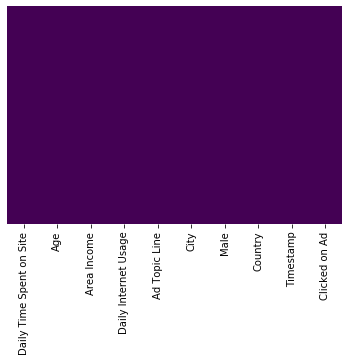

In [6]:
sns.heatmap(ad_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

 No null values so it is clean. Lets explore relevant columns.

Text(0.5, 0, 'Age')

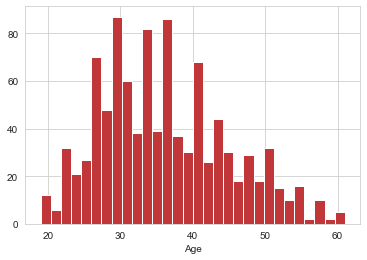

In [11]:
sns.set_style('whitegrid')
sns.set_palette("RdBu")
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

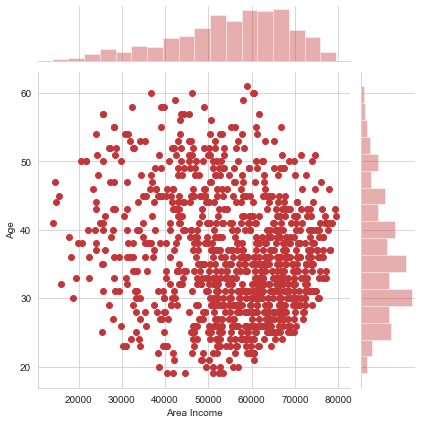

In [12]:
sns.jointplot(x="Area Income",y="Age",data=ad_data)

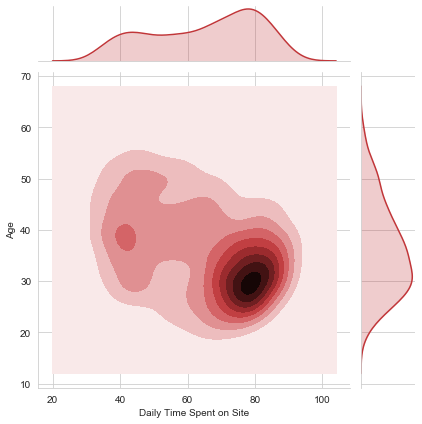

In [13]:
sns.jointplot(x="Daily Time Spent on Site",y="Age",data=ad_data,kind="kde")

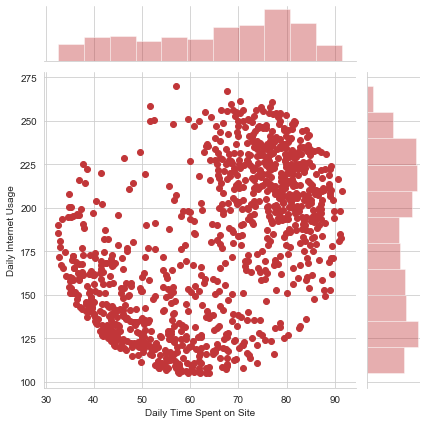

In [14]:
sns.jointplot(x="Daily Time Spent on Site",y="Daily Internet Usage",data=ad_data)

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


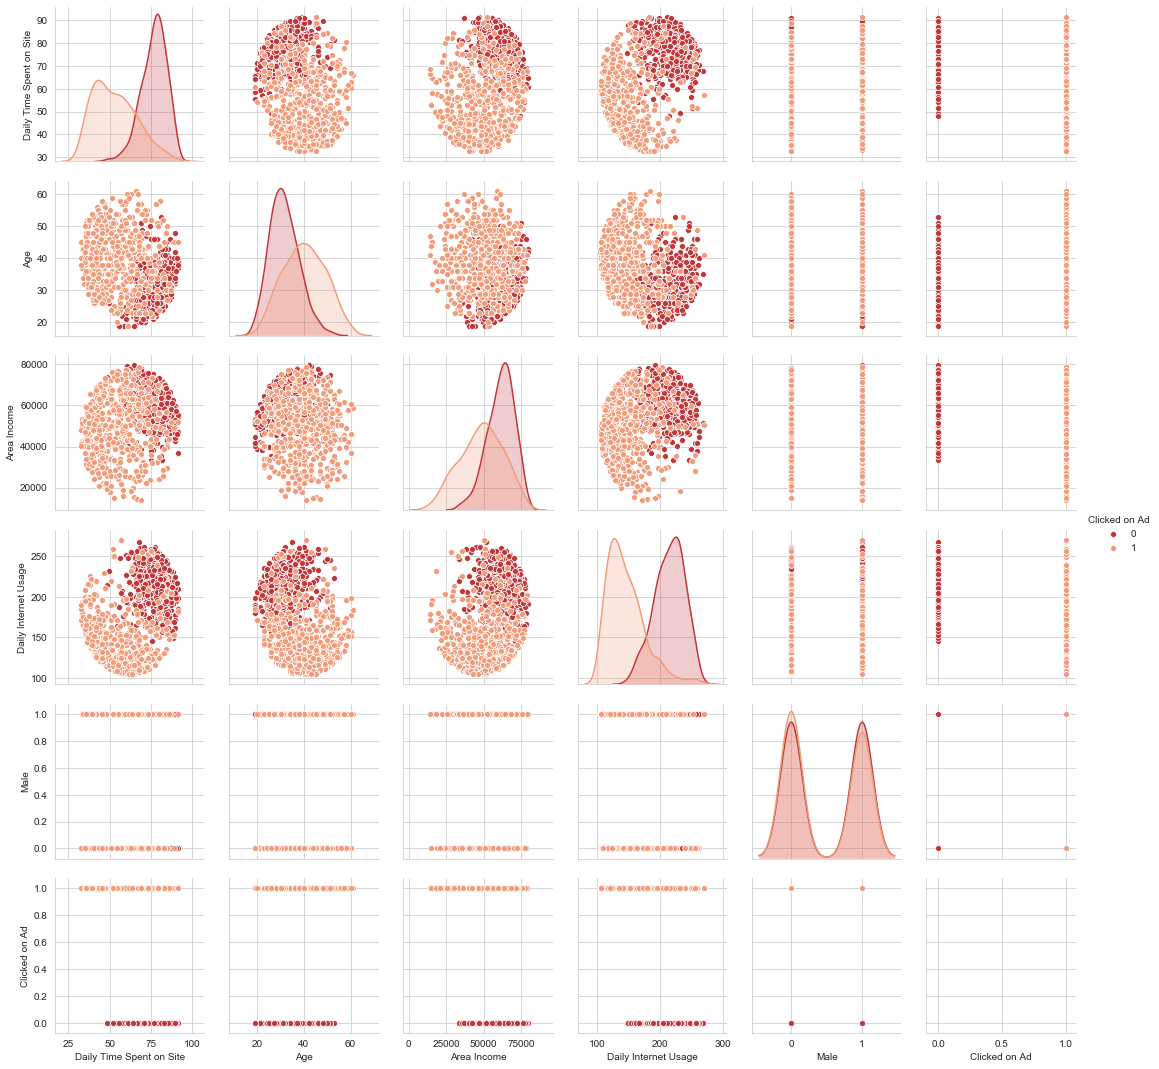

In [15]:
sns.pairplot(ad_data,hue="Clicked on Ad")

## Training the model

Now i will use train test split on the data and use the logistic regression method to train the model.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
x = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.33, 
                                                    random_state=42)

In [25]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluating the model

In [26]:
predictions = logmodel.predict(X_test)

In [29]:
print(classification_report(predictions,Y_test))
print(confusion_matrix(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       180
           1       0.86      0.96      0.91       150

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

[[156  24]
 [  6 144]]


There we go, our model has a good accuracy and the it does not have too many false positive/negatives as seen from the confusion matrix.


Thanks for having a look!